In [1]:
import os.path as op
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas
import time
from scipy.sparse.linalg import LinearOperator
import h5py
from scipy.sparse.linalg import eigsh
from scipy.sparse import coo_matrix
from cooltools.lib.common import make_cooler_view, align_track_with_cooler
import cooler
import cooltools
from cooltools.api.eigdecomp import _phase_eigs, eigs_cis
from cooltools.lib.numutils import _logbins_numba
from cooltools.api.expected import expected_cis
import bioframe
from multiprocessing import Pool
import multiprocessing
from cooltools.lib import numutils
from timeit import timeit
import block_decomposition as bd
from bioframe import make_viewframe

In [2]:
%matplotlib inline 

In [3]:
filepath = '/users/vladimir.dmitriev/src/cooler_utils//cooler-binder/data/Rao2014-GM12878-MboI-allreps-filtered.1000kb.cool'
#filepath = '/groups/goloborodko/seqdata/hsiehDarzacq2019/mm10/distiller_0.3.3/results/coolers_library_group/ESC.mm10.mapq_30.100.mcool::/resolutions/1000'

In [4]:
c = cooler.Cooler(filepath)

In [5]:
make_cooler_view(c).iloc[1]

chrom         chr2
start            0
end      243199373
name          chr2
Name: 1, dtype: object

In [10]:
## parameters

balance = True
block_size = 10
#chr_num = 1
#reg = make_viewframe([tuple([str(i) for i in list(make_cooler_view(c).loc[chr_num].to_frame().T.to_records(index=False)[0])])])

In [11]:
## time

t1 = timeit(lambda : bd.cis_eig_blockwise(c=c,balance=balance,ignore_diags=2, bad_bins=np.array([2,3]), block_size=block_size), number = 1)
#t2 = timeit(lambda : eigs_cis(c, ignore_diags = 2), number = 1)

print(t1, "Blockwise time")
#print(t2, "Normal time")


IndexError: index -278 is out of bounds for axis 1 with size 250

In [ ]:
3>=6

In [21]:
%%prun
eVals_block, eVecs_block = bd.cys_eig_blockwise(c=c,balance=balance,ignore_diags=2, block_size=1000)
#eVals, eVecs = eigs_cis(c, ignore_diags=2)

/users/vladimir.dmitriev/src/cooltools/cooltools/api/expected.py:138: RuntimeWarning: overflow encountered in long_scalars
  dcount[diag] = 2 * k - ixn[diag] - pl - (k - pr)
/users/vladimir.dmitriev/src/cooltools/cooltools/api/expected.py:138: RuntimeWarning: overflow encountered in long_scalars
  dcount[diag] = 2 * k - ixn[diag] - pl - (k - pr)
/users/vladimir.dmitriev/src/cooltools/cooltools/sandbox/expected_smoothing.py:40: RuntimeWarning: invalid value encountered in log
  np.log(fp),


AttributeError: Can't pickle local object 'multiply_A_block_par.<locals>.<lambda>'

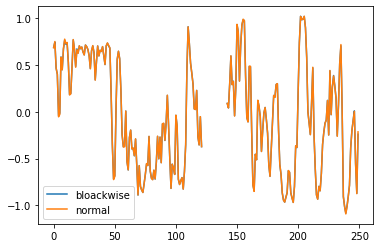

In [8]:
e1 = eVecs_block[eVecs_block['chrom'] == 'chr1']['E1']
e2 = eVecs[eVecs['chrom'] == 'chr1']['E1']

if np.max(np.abs(e1+e2)) < np.max(np.abs(e1-e2)):
    e1 =-e1

plt.plot(e1, label="bloackwise")
plt.plot(e2, label="normal")
plt.legend()
plt.show()

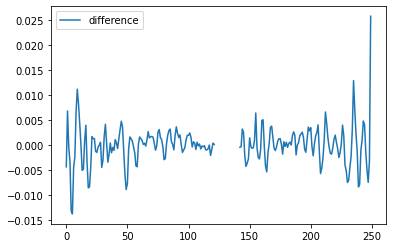

In [9]:
plt.plot(e2-e1, label="difference")
plt.legend()
plt.show()